In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [13]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train = True, download= True, transform=transform)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)


In [23]:
class Autoencoder_Linear(nn.Module):
    def __init__(self):
        super().__init__()
        #N, 784(28*28) where N is batchsize
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), # N,784 -> N, 128
            nn.ReLU(), 
            nn.Linear(128, 64), 
            nn.ReLU(), 
            nn.Linear(64, 12), 
            nn.ReLU(), 
            nn.Linear(12, 3) # N, 3  (reduced image size)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), 
            nn.ReLU(), 
            nn.Linear(12, 64), 
            nn.ReLU(), 
            nn.Linear(64, 128), 
            nn.ReLU(), 
            nn.Linear(128, 28*28), 
            nn.Sigmoid() #N,3 -> N, 784
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

#Note: [-1, 1] -> nn.Tanh


In [24]:
model =Autoencoder_Linear().to(device)
criterion = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay=1e-5)

In [20]:
num_epochs =10
outputs =[]
for epoch in range(num_epochs):
    for(img, _) in data_loader:
        img = img.reshape(-1, 28*28).to(device)
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img.cpu().detach(), recon.cpu().detach()))


Epoch: 1, Loss:0.0425
Epoch: 2, Loss:0.0352
Epoch: 3, Loss:0.0328
Epoch: 4, Loss:0.0351
Epoch: 5, Loss:0.0378
Epoch: 6, Loss:0.0367
Epoch: 7, Loss:0.0340
Epoch: 8, Loss:0.0301
Epoch: 9, Loss:0.0300
Epoch: 10, Loss:0.0297


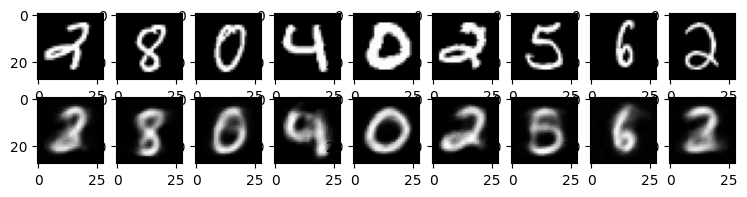

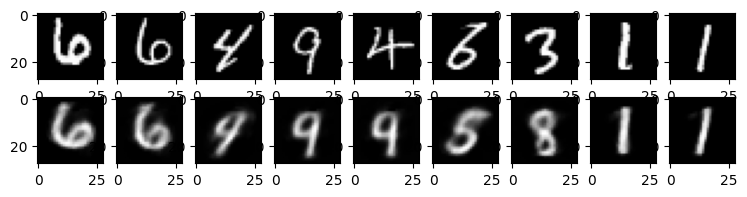

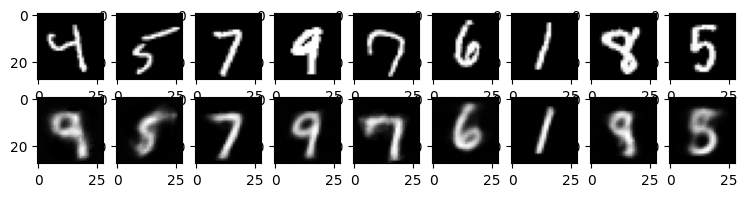

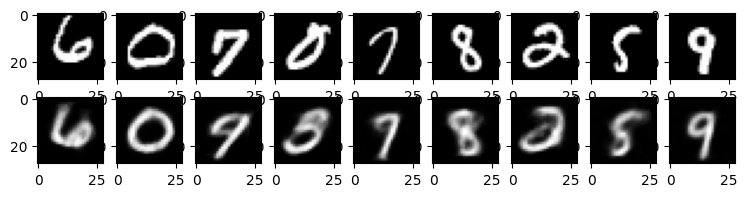

In [25]:
for k in range(0, num_epochs,3):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].numpy()
    recon = outputs[k][2].numpy()
    for i, item in enumerate(imgs):
        if i>=9: break
        plt.subplot(2,9, i+1)
        item = item.reshape(-1,28,28)
        plt.imshow(item[0])
    for i, item, in enumerate(recon):
        if i>=9: break
        plt.subplot(2,9, 9+i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])


In [26]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        #N, 28*28 where N is batchsize
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1), # N,16, 14*14 
            nn.ReLU(), 
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1), #N, 32, 7*7
            nn.ReLU(), 
            nn.Conv2d(32, 64, kernel_size=7)  # N, 64, 1*1  (reduced image size)
        )

        # N, 64, 1*1  (reduced image size)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7), #N, 32,7*7 
            nn.ReLU(), 
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), #N, 16, 14*14
            nn.ReLU(), 
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), #N, 1, 28*28
            nn.Sigmoid() 
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

#Note: [-1, 1] -> nn.Tanh
#nn.MaxPool2d -> nn.MaxUnpool2d


In [27]:
model =Autoencoder().to(device)
criterion = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay=1e-5)

In [28]:
num_epochs =10
outputs =[]
for epoch in range(num_epochs):
    for(img, _) in data_loader:
        img = img.to(device)  #changed here
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img.cpu().detach(), recon.cpu().detach()))


Epoch: 1, Loss:0.0088
Epoch: 2, Loss:0.0061
Epoch: 3, Loss:0.0045
Epoch: 4, Loss:0.0035
Epoch: 5, Loss:0.0030
Epoch: 6, Loss:0.0035
Epoch: 7, Loss:0.0029
Epoch: 8, Loss:0.0029
Epoch: 9, Loss:0.0028
Epoch: 10, Loss:0.0027


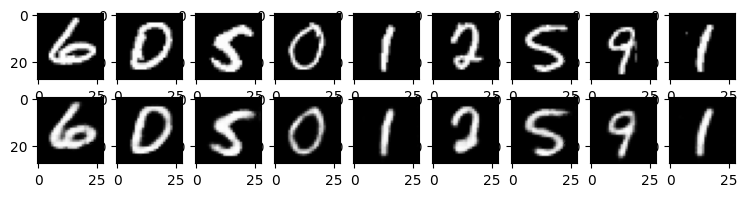

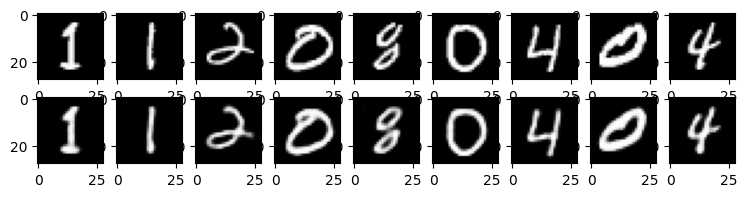

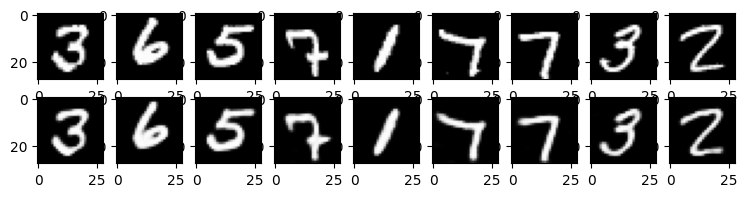

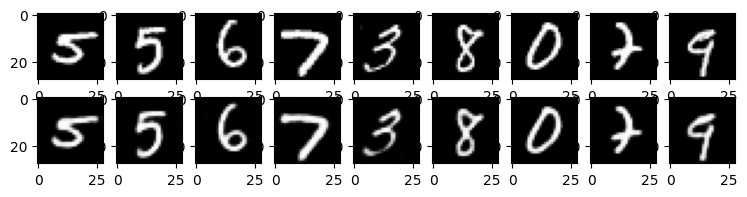

In [29]:
for k in range(0, num_epochs,3):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].numpy()
    recon = outputs[k][2].numpy()
    for i, item in enumerate(imgs):
        if i>=9: break
        plt.subplot(2,9, i+1)
        plt.imshow(item[0])
    for i, item, in enumerate(recon):
        if i>=9: break
        plt.subplot(2,9, 9+i+1)
        plt.imshow(item[0])
